In [1]:
# project: p11
# submitter: cjwacker
# partner: dargall
# hours: 5

In [2]:
#MADE EDIT IN QUESTION 19 BECAUSE THE CODE WOULDN'T WORK WITH THE AUTOGRADER, though it worked with test.py
%matplotlib inline

import pandas as pd

def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [3]:
import os
import json
import csv 
from collections import namedtuple 

def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data  


def transform_csv(header, data):
    dict_list = [] #should be defined outside the for loop, because it stores the entire data
    
    for row in data:
        if len(row) != len(header): 
            continue
        new_row = {} #should be defined inside the for loop, because it represents one row as a dictionary
        for i in range(len(header)):
            new_row[header[i]] = row[i]
        dict_list.append(new_row)
    return dict_list

def format_numbers(number): 
    if type(number) == int: 
        return number
    elif number[-1].lower() == "b":
        number = float(number[:-1]) * 1000000000
        return int(number)
    elif number[-1].lower() == "m": 
        number = float(number[:-1]) * 1000000 
        return int(number)
    elif number[-1].lower() == "k":
        number = float(number[:-1]) * 1000 
        return int(number) 
    elif len(number) > 4: 
        return 0
    else: 
        return int(number)
    
Tweet = namedtuple("Tweet", ["tweet_id", "username", "num_liked", "length"])
t = Tweet("id123", "user456", 100, 140)

def find_tweet_csv(file_name, path):
    tweets = [] 
    f = process_csv(os.path.join(path, file_name))
    header = f[0]
    data = f[1:]
    tweet_dict = transform_csv(header, data)
    for i in tweet_dict: 
        
        tweets.append(Tweet(i["tweet_id"], i["username"], format_numbers(i["num_liked"]), len(i["tweet_text"])))
    return tweets 

def process_json(file_name, path): 
    f = open(os.path.join(path, file_name), encoding="utf-8")
    data = json.load(f)
    f.close() 
    return data 

def tweets_greater_than(textLength, directory):
    tweets_list = []
    path_list = sorted(os.listdir(directory), reverse = True)
    for file in path_list:
        if ".csv" in file:
            tweets_list += find_tweet_csv(file, directory)
        elif ".json" in file:
            tweets_list += find_tweet_json(file, directory)
    tweets_of_length = []
    for tweet in tweets_list:
        if tweet.length > textLength:
            tweets_of_length.append(tweet)
    return tweets_of_length

def file_of_id(tweet_id, directory):
    tweets_id_list = []
    path_list = sorted(os.listdir(directory), reverse = True)
    for file in path_list:
        if ".csv" in file:
            tweets_id_list += find_tweet_csv(file, directory)
        elif ".json" in file:
            tweets_id_list += find_tweet_json(file, directory)
        for tweet in tweets_id_list:
            if tweet.tweet_id == tweet_id:
                return [os.path.join(directory, file)]

def files_contain_user(user, directory):
    tweets_id_list = []
    users_files = []
    path_list = os.listdir(directory)
    for file in path_list:
        if ".csv" in file:
            tweets_id_list = find_tweet_csv(file, directory)
        elif ".json" in file:
            tweets_id_list = find_tweet_json(file, directory)
        for tweet in tweets_id_list:
            if tweet.username == user:
                if os.path.join(directory, file) not in users_files:
                    users_files.append(os.path.join(directory, file))
    return sorted(users_files, reverse = True)

def find_tweet_json(file_name, path):
    tweets = [] 
    try:
        f = open(os.path.join(path, file_name), encoding="utf-8")
        data = json.load(f)
        f.close() 
        for i in data: 
            tweets.append(Tweet(i, data[i]["username"], format_numbers(data[i]["num_liked"]), len(data[i]["tweet_text"])))
    except:
        pass
    return tweets 

In [4]:
#Q1: How many unique tweet lengths are present in the dataset?

def unique_directory(directory):
    tweets_list = []
    path_list = sorted(os.listdir(directory), reverse = True)
    for file in path_list:
        if ".csv" in file:
            tweets_list += find_tweet_csv(file, directory)
        elif ".json" in file:
            tweets_list += find_tweet_json(file, directory)
    tweets_of_length = []
    for tweet in tweets_list:
        if tweet.length not in tweets_of_length:
            tweets_of_length.append(tweet.length)
    return len(tweets_of_length)

unique_directory("full_data")

131

In [5]:
#Q2: Which usernames appear in the dataset?
def usernames_directory(directory):
    tweets_list = []
    path_list = sorted(os.listdir(directory), reverse = True)
    for file in path_list:
        if ".csv" in file:
            tweets_list += find_tweet_csv(file, directory)
        elif ".json" in file:
            tweets_list += find_tweet_json(file, directory)
    usernames = []
    for tweet in tweets_list:
        if tweet.username not in usernames:
            usernames.append(tweet.username)
    return usernames

usernames_directory("full_data")

['USERID_1',
 'USERID_7',
 'USERID_10',
 'USERID_9',
 'USERID_4',
 'USERID_6',
 'USERID_3',
 'USERID_2',
 'USERID_5',
 'USERID_8']

In [6]:
#Q3: How prolific is each user?

tweets_list = []
path_list = sorted(os.listdir("full_data"), reverse = True)
for file in path_list:
    if ".csv" in file:
        tweets_list += find_tweet_csv(file, "full_data")
    elif ".json" in file:
        tweets_list += find_tweet_json(file, "full_data")

def prolificness(directory):
    prolific_dict = {}
    for user in usernames_directory(directory):
        tweets_user = []
        for tweet in tweets_list:
            if tweet.username == user:
                tweets_user.append(tweet)
        prolific_dict[user] = len(tweets_user)
    return prolific_dict
    
prolificness("full_data")

{'USERID_1': 52,
 'USERID_7': 55,
 'USERID_10': 45,
 'USERID_9': 44,
 'USERID_4': 35,
 'USERID_6': 51,
 'USERID_3': 39,
 'USERID_2': 47,
 'USERID_5': 46,
 'USERID_8': 31}

In [7]:
#Q4: What is the length of the longest tweet for each user?
max_length_user = {}
for user in usernames_directory("full_data"):
    max_len_user = []
    max_tweet = 0
    for tweet in tweets_list:
        if tweet.username == user:
            if tweet.length > max_tweet:
                max_tweet = tweet.length
    max_length_user[user] = max_tweet

max_length_user

{'USERID_1': 150,
 'USERID_7': 144,
 'USERID_10': 136,
 'USERID_9': 137,
 'USERID_4': 138,
 'USERID_6': 145,
 'USERID_3': 138,
 'USERID_2': 138,
 'USERID_5': 146,
 'USERID_8': 145}

In [8]:
#Q5: What is the largest number of likes received on a tweet for each user?
max_likes_user = {}
for user in usernames_directory("full_data"):
    max_len_user = []
    max_likes = 0
    for tweet in tweets_list:
        if tweet.username == user:
            if tweet.num_liked > max_likes:
                max_likes = tweet.num_liked
    max_likes_user[user] = max_likes

max_likes_user

{'USERID_1': 9393,
 'USERID_7': 9851,
 'USERID_10': 9936,
 'USERID_9': 9728,
 'USERID_4': 9618,
 'USERID_6': 9149,
 'USERID_3': 9678,
 'USERID_2': 869000000,
 'USERID_5': 9608,
 'USERID_8': 915000}

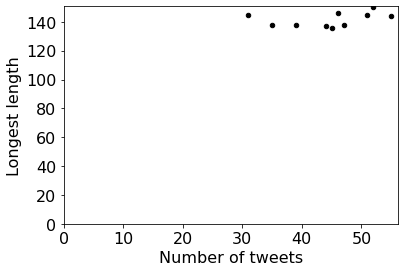

In [9]:
#Q6: What is the relationship between the number of tweets by a user and the length of their longest tweet?
dict_x_axis = prolificness("full_data")
dict_y_axis = max_length_user

scatter(dict_x_axis, dict_y_axis, xlabel="Number of tweets", ylabel="Longest length")

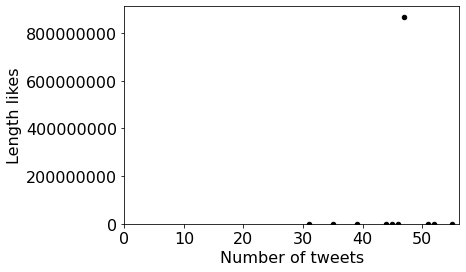

In [10]:
#Q7: What is the relationship between the number of tweets and the largest number of likes?

x_axis = prolificness("full_data")
y_axis = max_likes_user

scatter(x_axis, y_axis, xlabel="Number of tweets", ylabel="Length likes")


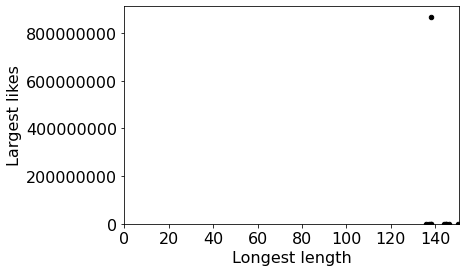

In [11]:
#Q8: What is the relationship between the length of their longest tweet and the largest number of likes?

length = max_length_user
likes = max_likes_user

scatter(length, likes, xlabel="Longest length", ylabel="Largest likes")



In [12]:
#Q9: What is the username of the user represented by the outlier in the last two plots?
outlier = 0
for value in max_likes_user.values():
    if value > outlier:
        outlier = value

outlier_user = None

for user in max_likes_user.keys():
    if max_likes_user[user] == outlier:
        outlier_user = user

outlier_user

'USERID_2'

In [13]:
#Q10: What are the tweets made by that outlier user?
outlier_tweets = []
for tweet in tweets_list:
    if tweet.username == outlier_user:
        outlier_tweets.append(tweet)
outlier_sorted = sorted(outlier_tweets, key = lambda p: p[2], reverse = True)
outlier_sorted

[Tweet(tweet_id='1467894593', username='USERID_2', num_liked=869000000, length=136),
 Tweet(tweet_id='1467875163', username='USERID_2', num_liked=9891, length=69),
 Tweet(tweet_id='1467862806', username='USERID_2', num_liked=9465, length=68),
 Tweet(tweet_id='1467907751', username='USERID_2', num_liked=9048, length=110),
 Tweet(tweet_id='1467928764', username='USERID_2', num_liked=9026, length=41),
 Tweet(tweet_id='1467943007', username='USERID_2', num_liked=9000, length=130),
 Tweet(tweet_id='1467918682', username='USERID_2', num_liked=8884, length=102),
 Tweet(tweet_id='1467935121', username='USERID_2', num_liked=8740, length=37),
 Tweet(tweet_id='1467947913', username='USERID_2', num_liked=8578, length=36),
 Tweet(tweet_id='1467892667', username='USERID_2', num_liked=8270, length=20),
 Tweet(tweet_id='1467897316', username='USERID_2', num_liked=7890, length=64),
 Tweet(tweet_id='1467854917', username='USERID_2', num_liked=7741, length=30),
 Tweet(tweet_id='1467961106', username='USE

In [14]:
#Q11: After excluding the outlier tweet of this outlier user (found in q10), what is the average of the remaining num_liked values for this user?
total_likes = 0
for tweet in outlier_sorted[1:]:
    total_likes += tweet.num_liked
total_likes/len(outlier_sorted[1:])

5003.565217391304

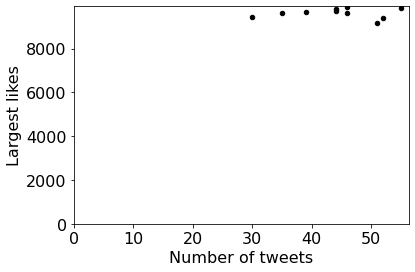

In [15]:
#Q12: If we exclude the top 3 most-liked tweets (among all tweets), what is the relationship between the number of tweets and the largest number of likes?
total_sorted = sorted(tweets_list, key = lambda p: p[2], reverse = True)

largest_likes_no_outlier ={}
num_tweets_no_outlier = {}

for user in usernames_directory("full_data"):
    max_len_user = []
    max_likes = 0
    tweets_user = []
    for tweet in total_sorted[3:]:
        if tweet.username == user:
            tweets_user.append(tweet)
            if tweet.num_liked > max_likes:
                max_likes = tweet.num_liked
    num_tweets_no_outlier[user] = len(tweets_user)
    largest_likes_no_outlier[user] = max_likes
    
x_lable = num_tweets_no_outlier
y_lable = largest_likes_no_outlier
scatter(x_lable, y_lable, xlabel="Number of tweets", ylabel="Largest likes")



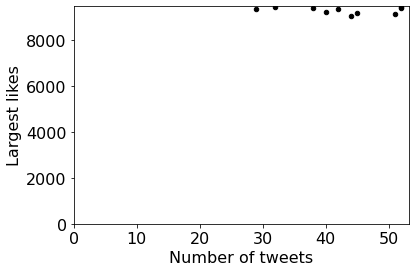

In [16]:
#Q13: If we exclude the 20 most-liked tweets (among all tweets), what is the relationship between the number of tweets and the largest number of likes?
largest_likes_no_20 ={}
num_tweets_no_20 = {}

for user in usernames_directory("full_data"):
    max_len_user = []
    max_likes = 0
    tweets_user = []
    for tweet in total_sorted[20:]:
        if tweet.username == user:
            tweets_user.append(tweet)
            if tweet.num_liked > max_likes:
                max_likes = tweet.num_liked
    num_tweets_no_outlier[user] = len(tweets_user)
    largest_likes_no_outlier[user] = max_likes
    
x_lable_1 = num_tweets_no_outlier
y_lable_1 = largest_likes_no_outlier
scatter(x_lable_1, y_lable_1, xlabel="Number of tweets", ylabel="Largest likes")


In [17]:
#Q14: What are the files in the rb directory of play directory?

def files_list(directory):
    if os.path.isfile(directory):
        return [directory]
    files = []
    for filename in os.listdir(directory):
        files += files_list(os.path.join(directory, filename))
    return sorted(files)

files_list(os.path.join("play","rb"))


['play\\rb\\ppt.ppt', 'play\\rb\\rb9\\12.xls', 'play\\rb\\rb9\\89.csv']

In [18]:
#Q15: What are the files in the qwe directory of ls directory of the play directory?
files_list(os.path.join("play", "ls", "qwe"))


['play\\ls\\qwe\\iuqwe.json', 'play\\ls\\qwe\\usun.pdf']

In [19]:
#Q16: What are the files in the play directory?
files_list(os.path.join("play"))


['play\\ls\\lu.txt',
 'play\\ls\\mf.py',
 'play\\ls\\qwe\\iuqwe.json',
 'play\\ls\\qwe\\usun.pdf',
 'play\\ou\\a',
 'play\\ou\\b',
 'play\\ou\\quap\\aoq\\aqnsa',
 'play\\ou\\quap\\aoq\\qsonj',
 'play\\ou\\quap\\qonxu.txt',
 'play\\ou\\quap\\uikwe',
 'play\\ou\\v',
 'play\\rb\\ppt.ppt',
 'play\\rb\\rb9\\12.xls',
 'play\\rb\\rb9\\89.csv']

In [20]:
#Q17: What are the files in the others directory of the recursive directory?
files_list(os.path.join("recursive", "others"))


['recursive\\others\\USERID_10.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_9.json']

In [21]:
#Q18: What are the files in the recursive directory?
files_list(os.path.join("recursive"))


['recursive\\USERID_1\\tweets.json',
 'recursive\\USERID_2\\tweets.json',
 'recursive\\USERID_3\\tweets.json',
 'recursive\\USERID_4\\1.csv',
 'recursive\\USERID_4\\1.json',
 'recursive\\USERID_4\\2.csv',
 'recursive\\USERID_4\\2.json',
 'recursive\\USERID_4\\false\\tweets.json',
 'recursive\\USERID_4\\true\\tweets.json',
 'recursive\\others\\USERID_10.json',
 'recursive\\others\\USERID_5.json',
 'recursive\\others\\USERID_6.json',
 'recursive\\others\\USERID_7.json',
 'recursive\\others\\USERID_8.json',
 'recursive\\others\\USERID_9.json']

In [22]:
#Q19: How many tweets are in the files in the USERID_4 directory of the recursive directory?
tweets_list = []
files = files_list(os.path.join("recursive", "USERID_4")) #changed this from "recursive\\USERID_4" to os.path.join(...) 
for file in files:
        if ".csv" in file:
            tweets_list += find_tweet_csv(file, "")
        elif ".json" in file:
            tweets_list += find_tweet_json(file, "") 
len(tweets_list)

37

In [23]:
#Q20: How many tweets are in the files in the recursive directory? 
tweets_list = []
files = files_list("recursive") 
for file in files:
        if ".csv" in file:
            tweets_list += find_tweet_csv(file, "")
        elif ".json" in file:
            tweets_list += find_tweet_json(file, "") 
len(tweets_list)

220